In [ ]:
  #importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the dataset
df=pd.read_csv('/healthcare_dataset.csv')

In [ ]:
#displaying the head of the dataset
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
#check for missing data
Missing_Data = df.isnull().sum()
print(Missing_Data)

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [ ]:
#there are no missing data

In [ ]:
#check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'number of duplicate rows = {duplicate_rows}')

number of duplicate rows = 534


In [ ]:
#There are 534 duplicate rows

In [ ]:
#display the number of unique values in each column
unique_values = df.nunique()
print(unique_values)

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64


In [ ]:
#checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
#We can also see that we need to change the type of "Date of admission" and "Discharge date" from object to date
#we need to change the room number to object

In [ ]:
# Analyze the distribution of key categorical features
for col in ['Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Test Results']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

# Examine correlation between numerical features
print(df[['Age', 'Billing Amount', 'Room Number']].corr())


Value counts for Medical Condition:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

Value counts for Doctor:
Doctor
Michael Smith           27
Robert Smith            22
John Smith              22
Michael Johnson         20
James Smith             20
                        ..
Audrey Zimmerman DDS     1
Justin Banks             1
Joseph Williams Jr.      1
Jason Franklin           1
Jeffrey Moore            1
Name: count, Length: 40341, dtype: int64

Value counts for Hospital:
Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count

Based on the above results we can see that all the data is normally distributed and the correlation is significan between the Age, Billing Amount and Room Number

# Data Preprocessing

### Handling wrong Formats

In [ ]:
# Convert date columns to datetime objects
for col in ['Date of Admission', 'Discharge Date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Correct inconsistent capitalization (optional but recommended)
for col in ['Name', 'Doctor', 'Hospital']:
    df[col] = df[col].str.title()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### Removing the Duplicate rows

In [ ]:
df = df.drop_duplicates()

In [ ]:
#checking the new dataset (X2) dimensions
df.shape

(54966, 15)

In [ ]:
#display the number of unique values in each column
unique_values = df.nunique()
print(unique_values)

Name                  40235
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64


### Checking for outliers

In [ ]:
#Checking for outliers
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,54966.000000,54966,54966.000000,54966.000000,54966
mean,51.535185,2021-11-01 17:35:29.505512448,25544.306284,301.124404,2021-11-17 05:34:28.202161408
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13243.718641,202.000000,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25542.749145,302.000000,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37819.858159,401.000000,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.605661,NaN,14208.409711,115.223143,NaN


In [ ]:
#check for outliers for Age
# Calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
#Calculate the boundaries - lower and upper
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Find Outliers - points above or below the boundaries
iqr_outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
# Display the outliers
# iqr_outliers.head()
#See the number of outliers
print("Number of outliers detected by IQR method: ", iqr_outliers.shape[0])

Number of outliers detected by IQR method:  0


In [ ]:
#check for outliers for Billing Amount
# Calculate IQR
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1
#Calculate the boundaries - lower and upper
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Find Outliers - points above or below the boundaries
iqr_outliers = df[(df['Billing Amount'] < lower_bound) | (df['Billing Amount'] > upper_bound)]
# Display the outliers
# iqr_outliers.head()
#See the number of outliers
print("Number of outliers detected by IQR method: ", iqr_outliers.shape[0])

Number of outliers detected by IQR method:  0


In [ ]:
#check for outliers for Room Number
# Calculate IQR
Q1 = df['Room Number'].quantile(0.25)
Q3 = df['Room Number'].quantile(0.75)
IQR = Q3 - Q1
#Calculate the boundaries - lower and upper
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Find Outliers - points above or below the boundaries
iqr_outliers = df[(df['Room Number'] < lower_bound) | (df['Room Number'] > upper_bound)]
# Display the outliers
# iqr_outliers.head()
#See the number of outliers
print("Number of outliers detected by IQR method: ", iqr_outliers.shape[0])

Number of outliers detected by IQR method:  0


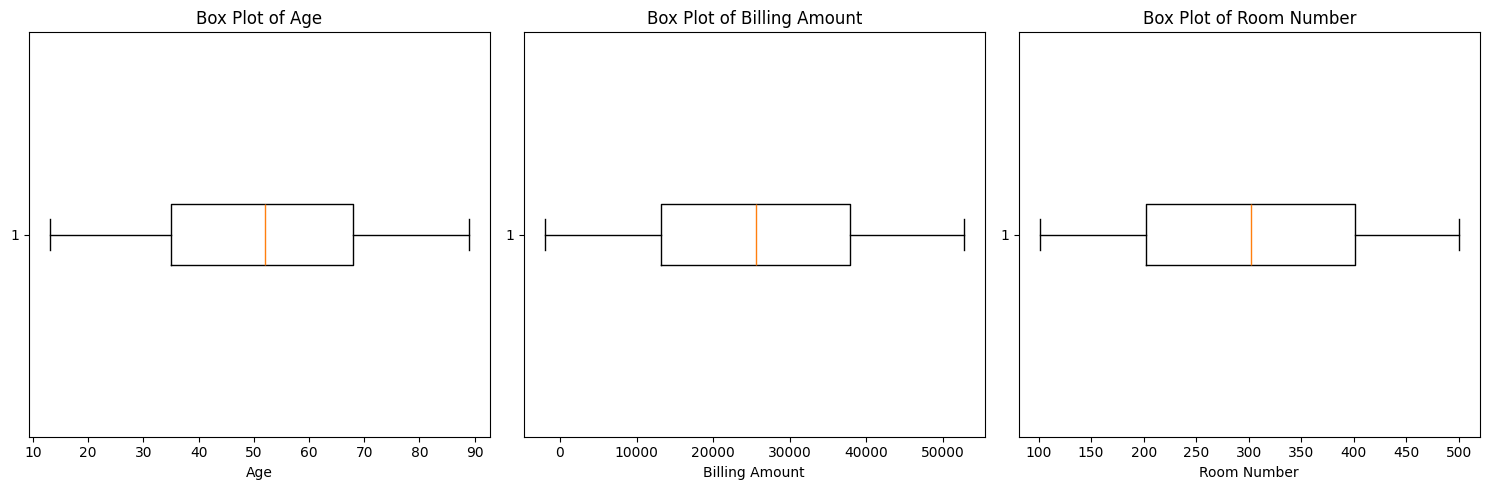

In [ ]:
# Create box plots
numerical_features = ['Age', 'Billing Amount', 'Room Number']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Analysis of 'Age':
The minimum age is 13 and the maximum age is 89.  The distribution seems reasonable, with no obvious outliers based on the box plot.

Analysis of 'Billing Amount':
The minimum billing amount is -2008.49, which is clearly an error.  Negative billing amounts are not possible.  The box plot also confirms the presence of outliers in the lower range.  These negative values should be investigated and corrected.  There are also some outliers on the higher end, but they appear less problematic than the negative values.  

Analysis of 'Room Number':
The minimum room number is 101 and the maximum is 500.  The box plot shows a relatively uniform distribution. There are no obvious outliers.

In [ ]:
# Outlier handling for 'Billing Amount'
# Replacing negative values with the median of positive values.
positive_billing_amounts = df[df['Billing Amount'] > 0]['Billing Amount']
median_positive_billing = positive_billing_amounts.median()
df['Billing Amount'] = df['Billing Amount'].apply(lambda x: median_positive_billing if x < 0 else x)

In [ ]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,54966.000000,54966,54966.000000,54966.000000,54966
mean,51.535185,2021-11-01 17:35:29.505512448,25594.632170,301.124404,2021-11-17 05:34:28.202161408
min,13.000000,2019-05-08 00:00:00,9.238787,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13326.001350,202.000000,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25593.873000,302.000000,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37819.858159,401.000000,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.605661,NaN,14162.191365,115.223143,NaN


In [ ]:
df_LE = df.copy()
df_OHE = df.copy()

# Using Label Encoder for Classification (Decision Tree, Random Forrest, Naive Bayes)

In [ ]:
#We have to Transform all features to numeric in order to use the standard scaler

df_LE['Date of Admission'] = pd.to_numeric(pd.to_datetime(df_LE['Date of Admission']))
df_LE['Discharge Date'] = pd.to_numeric(pd.to_datetime(df_LE['Discharge Date']))

In [ ]:
# Encode categorical features
label_encoders = {}
for column in df_LE.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_LE[column] = le.fit_transform(df_LE[column])
    label_encoders[column] = le

In [ ]:
df_LE.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,4223,30,1,5,2,1706659200000000000,26612,34469,1,18856.281306,328,2,1706832000000000000,3,2
1,23973,62,1,0,5,1566259200000000000,33648,20829,3,33643.327287,265,1,1566777600000000000,1,1
2,9537,76,0,1,5,1663804800000000000,37828,10300,0,27955.096079,205,1,1665100800000000000,0,2
3,2219,28,0,6,3,1605657600000000000,22511,17147,3,37909.782410,450,0,1608249600000000000,1,0
4,352,43,0,2,2,1663545600000000000,21259,38411,0,14238.317814,458,2,1665273600000000000,4,0
5,12564,36,1,0,1,1703030400000000000,37121,27543,4,48145.110951,389,2,1703376000000000000,1,2
6,12042,21,0,3,3,1604361600000000000,21958,15571,3,19580.872345,389,1,1605398400000000000,3,1
7,7253,20,0,0,2,1640649600000000000,36659,29924,2,45820.462722,277,1,1641513600000000000,3,1
8,16184,82,1,2,1,1593561600000000000,9260,34812,2,50119.222792,316,0,1594684800000000000,0,0
9,7499,58,0,3,2,1621728000000000000,14679,28044,4,19784.631062,249,0,1624320000000000000,3,1


### Using the decision tree model

In [ ]:
# Define features and target variable
X = df_LE.drop(columns=['Test Results'])  # Features
y = df_LE['Test Results']  # Target variable

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize numerical features
# We use the StandardScaler as the data is following a normal distribution.
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

# Fit and transform on numerical features only
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Train Decision Tree with entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Evaluate the models
y_pred_entropy = clf_entropy.predict(X_test)

In [ ]:
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))
print("Classification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))
print("Confusion Matrix (Entropy):\n", confusion_matrix(y_test, y_pred_entropy))

Accuracy (Entropy): 0.4205020920502092
Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.42      0.43      0.42      3616
           1       0.42      0.43      0.43      3682
           2       0.42      0.41      0.41      3696

    accuracy                           0.42     10994
   macro avg       0.42      0.42      0.42     10994
weighted avg       0.42      0.42      0.42     10994

Confusion Matrix (Entropy):
 [[1540 1046 1030]
 [1056 1573 1053]
 [1086 1100 1510]]


In [ ]:
#The Decision tree fails to predict the values accurately as the accuracy is 0.42241222484991814

### Using Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define features and target variable
X = df_LE.drop(columns=['Test Results'])  # Features
y = df_LE['Test Results']  # Target variable

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize numerical features
# We use the StandardScaler as the data is following a normal distribution and there are no outliers.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)

In [ ]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [ ]:
# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.4436965617609605


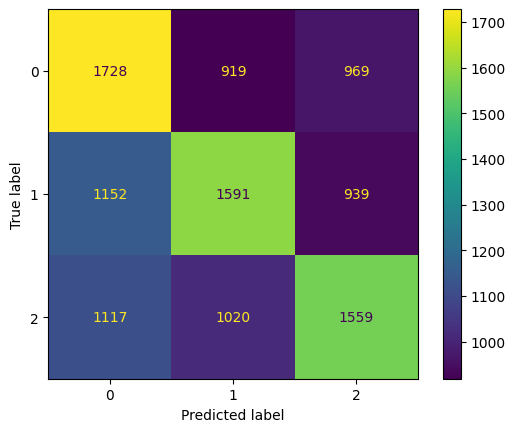

In [ ]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_test, y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()

### Using Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Train Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict using Naïve Bayes
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
# Evaluate Naïve Bayes
print("Accuracy (Naïve Bayes):", accuracy_score(y_test, y_pred_nb))
print("Classification Report (Naïve Bayes):\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix (Naïve Bayes):\n", confusion_matrix(y_test, y_pred_nb))
# Plot Confusion Matrices

Accuracy (Naïve Bayes): 0.3408222666909223
Classification Report (Naïve Bayes):
               precision    recall  f1-score   support

           0       0.33      0.45      0.38      3616
           1       0.34      0.26      0.30      3682
           2       0.35      0.31      0.33      3696

    accuracy                           0.34     10994
   macro avg       0.34      0.34      0.34     10994
weighted avg       0.34      0.34      0.34     10994

Confusion Matrix (Naïve Bayes):
 [[1630  935 1051]
 [1659  974 1049]
 [1593  960 1143]]


In [ ]:
# Compare Accuracy Scores
models = ['Decision Tree (Entropy)', 'Random Forrest', 'Naïve Bayes']
accuracy_scores = [
    accuracy_score(y_test, y_pred_entropy),
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_nb)
]

<ipython-input-208-37f421050ff5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette=["blue", "green", "red"])


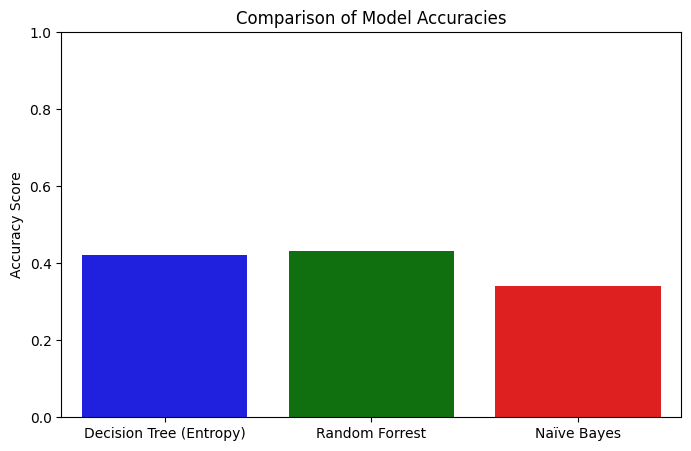

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette=["blue", "green", "red"])
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()

# Using OneHot Encoder for categorical classification

In [ ]:
# One-hot encode selected features
categorical_cols = ['Medical Condition', 'Insurance Provider', 'Admission Type', 'Test Results']
df_OHE = pd.get_dummies(df_OHE, columns=categorical_cols, drop_first=True)

# Label encode 'Gender' and 'Blood Type'
label_encoder = LabelEncoder()
for col in ['Gender', 'Blood Type']:
    df_OHE[col] = label_encoder.fit_transform(df_OHE[col])

In [ ]:
# Define features (X) and target (y)

X1 = df_OHE.drop('Test Results_Normal', axis=1)
y1 = df_OHE['Test Results_Normal']

# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)

# Split training set into training and validation sets
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.25, random_state=42, stratify=y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Remove problematic columns
cols_to_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date', 'Medication']
X1_train = X1_train.drop(columns=cols_to_drop)
X1_val = X1_val.drop(columns=cols_to_drop)
X1_test = X1_test.drop(columns=cols_to_drop)

# Instantiate the classifiers
rf_classifier = RandomForestClassifier()
gnb_classifier = GaussianNB()

# Train the classifiers
rf_classifier.fit(X1_train, y1_train)
gnb_classifier.fit(X1_train, y1_train)

GaussianNB()

In [ ]:
# Predictions
rf_predictions = rf_classifier.predict(X1_test)
gnb_predictions = gnb_classifier.predict(X1_test)

# Random Forest Evaluation
rf_cm = confusion_matrix(y1_test, rf_predictions)
rf_accuracy = accuracy_score(y1_test, rf_predictions)
rf_classification_rep = classification_report(y1_test, rf_predictions)

print("\nRandom Forest Classifier:")
print("Confusion Matrix:\n", rf_cm)
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_classification_rep)

# Gaussian Naive Bayes Evaluation
gnb_cm = confusion_matrix(y1_test, gnb_predictions)
gnb_accuracy = accuracy_score(y1_test, gnb_predictions)
gnb_classification_rep = classification_report(y1_test, gnb_predictions)

print("\nGaussian Naive Bayes Classifier:")
print("Confusion Matrix:\n", gnb_cm)
print("Accuracy:", gnb_accuracy)
print("Classification Report:\n", gnb_classification_rep)


Random Forest Classifier:
Confusion Matrix:
 [[5798 1530]
 [1774 1892]]
Accuracy: 0.6994724395124613
Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.79      0.78      7328
        True       0.55      0.52      0.53      3666

    accuracy                           0.70     10994
   macro avg       0.66      0.65      0.66     10994
weighted avg       0.69      0.70      0.70     10994


Gaussian Naive Bayes Classifier:
Confusion Matrix:
 [[3640 3688]
 [   0 3666]]
Accuracy: 0.6645442968892123
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.50      0.66      7328
        True       0.50      1.00      0.67      3666

    accuracy                           0.66     10994
   macro avg       0.75      0.75      0.66     10994
weighted avg       0.83      0.66      0.66     10994



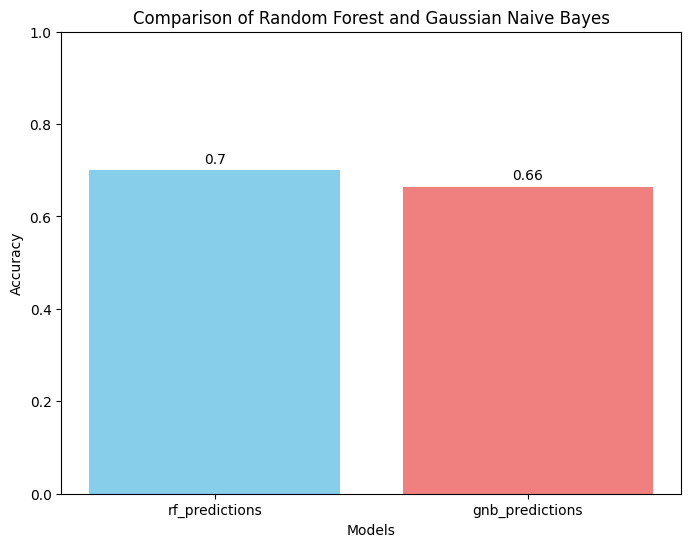

In [ ]:
models = ['rf_predictions', 'gnb_predictions']
accuracy_scores = [rf_accuracy, gnb_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Random Forest and Gaussian Naive Bayes")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Add accuracy values on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

# Conclusion

Data Cleaning: No missing values were found in the dataset. 54966 rows remained after duplicate removal. Inconsistent capitalization in name, doctor and hospital columns were corrected. Dates were successfully converted to datetime objects.

Outlier Detection: Negative values were found in the 'Billing Amount' column. These values were handled by replacing them with the median of the positive billing amounts.

Model Performance:
We created two model for classification, one using the Label Encoding only and we tried to classify the Decision Tree, Random Forrest and Naive Bayes and the random forrest was the best but the model performance was not good.

Therefore we tried to enhance the model accuracy by using another encoding method.
In the other method we used Label encoding and one hot encoding. And we classified using Random Forrest and Naive Bayes. Also Random forrest performed better reaching accuracy of 70 percent compared the first random forrest reaching 44 percent only.

Taking into consideration that we applied the second model on one of the test results Normal.